# Paper: Backward bifurcations in dengue transmission dynamics

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

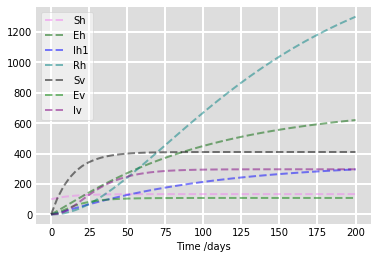

In [5]:
# Initial conditions

Sh0 = 100
Eh0 = 0
Ih = 0
Rh0 = 0
Sv0 = 1
Ev0 = 0 
Iv0 = 0

# A grid of time points (in days)
t = np.linspace(0, 200, 50) 

#parameters
pi_h = 10
pi_v = 30
lambdda_h = 0.05530
lambdda_v = 0.05
delta_h = 0.99
delta_v = 0.057
mu_h = 0.0195
mu_v = 0.016
sigma_h = 0.53
sigma_v = 0.2
tao_h = 0.1


# The SIR model differential equations.
def deriv(y, t, pi_h ,pi_v ,lambdda_h ,lambdda_v ,delta_h ,delta_v ,mu_h ,mu_v ,sigma_h ,sigma_v ,tao_h):
    Sh ,Eh ,Ih ,Rh ,Sv ,Ev ,Iv = y
    dShdt = pi_h - lambdda_h * Sh - mu_h * Sh
    dEhdt = lambdda_h * Sh - (sigma_h * mu_h) * Eh
    dIhdt = sigma_h * Eh - (tao_h + mu_h + delta_h) * Ih
    dRhdt = tao_h * Ih - mu_h * Rh
    dSvdt = pi_v - delta_v * Sv - mu_v * Sv
    dEvdt = delta_v * Sv - (sigma_v + mu_v) * Ev
    dIvdt = sigma_v * Ev - (mu_v + delta_v) * Iv

    return dShdt,dEhdt,dIhdt,dRhdt,dSvdt,dEvdt, dIvdt


# Initial conditions vector
y0 = Sh0 ,Eh0 ,Ih ,Rh0 ,Sv0 ,Ev0 ,Iv0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(pi_h ,pi_v ,lambdda_h ,lambdda_v ,delta_h ,delta_v ,mu_h ,mu_v ,sigma_h ,sigma_v ,tao_h))
Sh ,Eh ,Ih ,Rh ,Sv ,Ev ,Iv = ret.T

# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, Sh, 'violet', alpha=0.5, lw=2, label='Sh', linestyle='dashed')
ax.plot(t, Eh, 'darkgreen', alpha=0.5, lw=2, label='Eh', linestyle='dashed')
ax.plot(t, Ih, 'blue', alpha=0.5, lw=2, label='Ih1', linestyle='dashed')
ax.plot(t, Rh, 'teal', alpha=0.5, lw=2, label='Rh', linestyle='dashed')
ax.plot(t, Sv, 'black', alpha=0.5, lw=2, label='Sv', linestyle='dashed')
ax.plot(t, Ev, 'green', alpha=0.5, lw=2, label='Ev', linestyle='dashed')
ax.plot(t, Iv, 'purple', alpha=0.5, lw=2, label='Iv', linestyle='dashed')
ax.set_xlabel('Time /days')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [7]:
#save to csv file
a = np.asarray([t, Sh ,Eh ,Ih ,Rh ,Sv ,Ev ,Iv]) 

# np.savetxt("dengue.csv", a, delimiter=",")